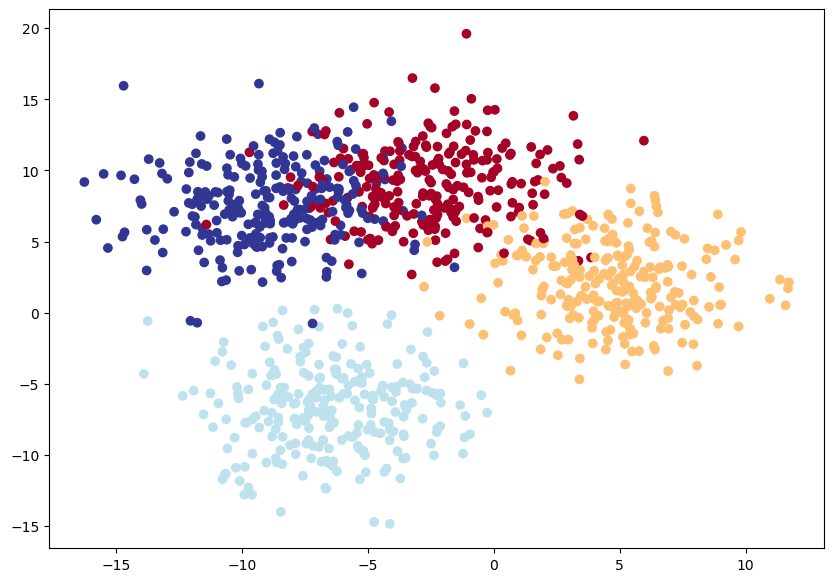

In [2]:
# kullanacagimiz veri setini cagiriyoruz.
from sklearn.datasets import make_blobs
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn

import matplotlib.pyplot as plt

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED =42


X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=2.75, random_state=RANDOM_SEED)


# verileri tensorlara donusturuyoruz.
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)


# verileri gorsellestiriyoruz.
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


In [3]:
# multi-class siniflandirma modeli kurma

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # non-lineer lik oldugu icin
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)
        
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8) # yukarida gorundugu gibi 4 kume oldugu icin output_features = 4
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [4]:
X_blob_train.shape , y_blob_train.shape, X_blob_test.shape, y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [5]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [6]:
# loss function and optimizer olusturma 

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.01)

In [7]:
# modeli calistirmadan onceki sonuclara bakalim.
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:10]


tensor([[ 0.2412,  0.1207, -0.2386,  0.0608],
        [ 0.7638,  0.2948, -1.3497,  1.0129],
        [ 1.1678, -0.7853, -2.4558,  1.0994],
        [ 0.2345,  0.2056, -0.3306,  0.0652],
        [ 0.4179,  0.2799, -0.7651,  0.4338],
        [ 1.0359,  0.2937, -1.8715,  1.4434],
        [ 0.9285, -0.5308, -1.9284,  0.8623],
        [ 0.4885,  0.5674, -0.9706,  0.7115],
        [ 1.6666, -1.0294, -3.7462,  1.8113],
        [ 0.4475,  0.4686, -0.8726,  0.5886]])

In [8]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [9]:
# "y_logits" i tahmin olasilik degerlerine ceviriyoruz.
y_pred_probs = torch.softmax(y_logits, dim=1)

In [10]:
y_pred_probs[:10]

tensor([[0.2994, 0.2654, 0.1853, 0.2500],
        [0.3301, 0.2065, 0.0399, 0.4235],
        [0.4756, 0.0675, 0.0127, 0.4442],
        [0.2955, 0.2871, 0.1679, 0.2495],
        [0.3131, 0.2728, 0.0959, 0.3181],
        [0.3296, 0.1569, 0.0180, 0.4954],
        [0.4493, 0.1044, 0.0258, 0.4205],
        [0.2806, 0.3036, 0.0652, 0.3506],
        [0.4489, 0.0303, 0.0020, 0.5188],
        [0.2907, 0.2969, 0.0776, 0.3348]])

In [11]:
torch.max(y_pred_probs[0]), torch.argmax(y_pred_probs[0]) 
# [0.2994, 0.2654, 0.1853, 0.2500] kumesinin maksimum degerini ve bu degerin indisini dondurur.


(tensor(0.2994), tensor(0))

In [12]:
y_preds = torch.argmax(y_pred_probs, dim=1)
# yukaridaki islemi butun degerlere uyguluyoruz.

In [13]:
# modeli egitmeden onceki sonuclar bunlar. 
y_preds[:10], y_blob_test[:10]

(tensor([0, 3, 0, 0, 3, 3, 0, 3, 3, 3]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [17]:
# dogruluk degerini hesaplama
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc


In [18]:
# sonuclari daha iyi gormek icin kullanacagimiz gorsellestirme metodlarini indiriyoruz.
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("this file already exists.")
else:
    print("downloading the file...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as file:
        file.write(request.content)
    
from helper_functions import plot_predictions, plot_decision_boundary

this file already exists.


# Modeli egitme

In [25]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_4.eval()
    
    with torch.inference_mode():
        y_test_logits = model_4(X_blob_test).type((torch.float32))
        y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(y_test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=y_test_preds)
        
    if epoch % 10 == 0:
        print(f"epoch:{epoch} | acc:{acc:.2f}% | loss:{loss:.4f} | test_acc:{test_acc:.2f}% | test_loss:{test_loss:.4f}")


epoch:0 | acc:90.38% | loss:0.3965 | test_acc:93.00% | test_loss:0.3475
epoch:10 | acc:90.50% | loss:0.3934 | test_acc:93.00% | test_loss:0.3444
epoch:20 | acc:90.50% | loss:0.3904 | test_acc:92.50% | test_loss:0.3415
epoch:30 | acc:90.62% | loss:0.3875 | test_acc:92.50% | test_loss:0.3386
epoch:40 | acc:90.50% | loss:0.3847 | test_acc:92.50% | test_loss:0.3358
epoch:50 | acc:90.50% | loss:0.3820 | test_acc:92.50% | test_loss:0.3331
epoch:60 | acc:90.50% | loss:0.3793 | test_acc:92.50% | test_loss:0.3305
epoch:70 | acc:90.62% | loss:0.3767 | test_acc:92.50% | test_loss:0.3279
epoch:80 | acc:90.62% | loss:0.3741 | test_acc:92.50% | test_loss:0.3254
epoch:90 | acc:90.50% | loss:0.3716 | test_acc:92.50% | test_loss:0.3230


In [26]:
# tahmin yapma
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

In [ ]:
## egittikten sonraki sonuclar

In [27]:
y_pred[:10], y_blob_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

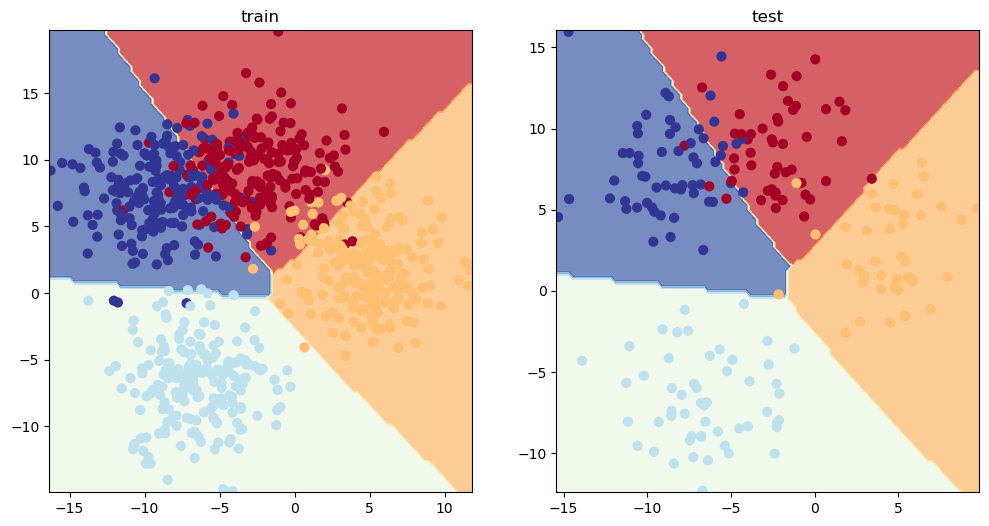

In [28]:
# daha iyi gorebilmek icin gorsellestiriyoruz.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

# DAHA DERINE INELIM!!!

In [29]:
# her asamada cikan degerleri gormek icin modeli calistiriyoruz.
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:10]
# amacimiz  "y_logits" i, tahmin olasiligina cevirmek. Buldugumuz bu tahmin olasilik degerlerini de
# tahmin etiketlerine cevirmek

tensor([[ 0.4720,  0.9873, -0.9004, -0.6587],
        [ 1.3421, -2.3315, -2.7245,  3.0074],
        [-6.0600, -3.0303,  6.6181, -0.4753],
        [ 0.0438,  1.1212, -0.5707, -0.4003],
        [ 2.3850, -0.1722, -2.6293, -0.0788],
        [ 1.3340, -3.7582, -3.2934,  4.5800],
        [-4.7570, -1.9803,  5.4277, -0.9679],
        [ 2.7204, -0.8326, -3.0552,  0.8312],
        [-8.6401, -5.3517,  9.1513,  0.9131],
        [ 2.6636, -0.3979, -2.9481,  0.2657]])

In [30]:
y_blob_test # yukarida buldugumuz "y_logits" i uygun fonksiyonlarla asagidaki formata cevirmeye calisacagiz.

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [31]:
# "y_logits" i tahmin olasilik degerlerine ceviriyoruz.
y_pred_probs = torch.softmax(y_logits, dim=1)

In [32]:
y_logits[:5], y_pred_probs[:5]

(tensor([[ 0.4720,  0.9873, -0.9004, -0.6587],
         [ 1.3421, -2.3315, -2.7245,  3.0074],
         [-6.0600, -3.0303,  6.6181, -0.4753],
         [ 0.0438,  1.1212, -0.5707, -0.4003],
         [ 2.3850, -0.1722, -2.6293, -0.0788]]),
 tensor([[3.0766e-01, 5.1504e-01, 7.7987e-02, 9.9310e-02],
         [1.5799e-01, 4.0106e-03, 2.7073e-03, 8.3529e-01],
         [3.1159e-06, 6.4469e-05, 9.9910e-01, 8.2988e-04],
         [1.9535e-01, 5.7371e-01, 1.0565e-01, 1.2529e-01],
         [8.5523e-01, 6.6301e-02, 5.6807e-03, 7.2788e-02]]))

In [33]:
# softmax 
a = y_logits[1]
torch.exp(a[0]) / torch.exp(a).sum()

tensor(0.1580)

In [34]:
print(sum(y_pred_probs[0])) # y_pred_probs tahmin etmeye calistigimiz 4 etiketin olasilik degerleridir. goruldugu gibi y_pred_probs un ilk indisindeki elemanlarin toplami 1 dir. 
# burada olasilik degeri yuksek olana indise gore label olusturma gerceklestirilir.
print(sum(y_pred_probs[1]))

tensor(1.)
tensor(1.)


In [35]:
torch.max(y_pred_probs[0]), torch.argmax(y_pred_probs[0]) # maksimum olasilik degerini ve 
# kacinci indiste oldugunu dondurur. Bu indis degeri class yani kume numarasidir.(0, 1, 2 ya da 3 )


(tensor(0.5150), tensor(1))

In [36]:
y_preds = torch.argmax(y_pred_probs, dim=1)
# yukaridaki islemi butun degerlere uyguluyoruz.

In [37]:
(y_preds[:10]), (y_blob_test[:10])

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [ ]:
# goruldugu gibi tahmin degerleri ile test degerleri ortusuyor.